## Results

In [1]:
import json
import pandas as pd 
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
RESULT_DIR = Path("../results")

def read_json(path: Path):
    with open(path, "r") as file:
        return json.load(file)
    
rows = []

# tabular baseline models
tab_path = RESULT_DIR / "tab_results.json"
tab = read_json(tab_path)
rows.extend(tab if isinstance(tab, list) else [tab])

# GraphSage
gnn_path = RESULT_DIR / "gnn_results.json"
gnn = read_json(gnn_path)
rows.append(gnn)

# GraphTransformer
tr_path = RESULT_DIR / "transf_results.json"
tr = read_json(tr_path)
rows.append(tr)

In [3]:
df = pd.DataFrame(rows)

cols = [c for c in ["model", "accuracy", "macro_f1", "best_val_accuracy"] if c in df.columns]

df = df[cols].copy()

df.sort_values("accuracy", ascending=False, inplace=True)
df

,model,accuracy,macro_f1,best_val_accuracy
1,RandomForest,0.989910,0.989913,NaN
2,GraphSAGE,0.978700,0.978741,0.97619
3,GraphTransformer,0.958520,0.958714,NaN
0,LogisticRegression,0.947309,0.947589,NaN


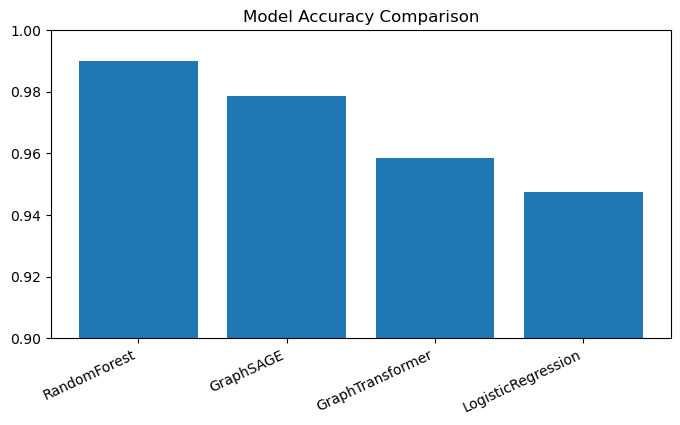

In [4]:
# Plotting accuracy

plt.figure(figsize=(8,4))
plt.bar(df["model"], df["accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1)
plt.xticks(rotation=25, ha="right")
plt.show()

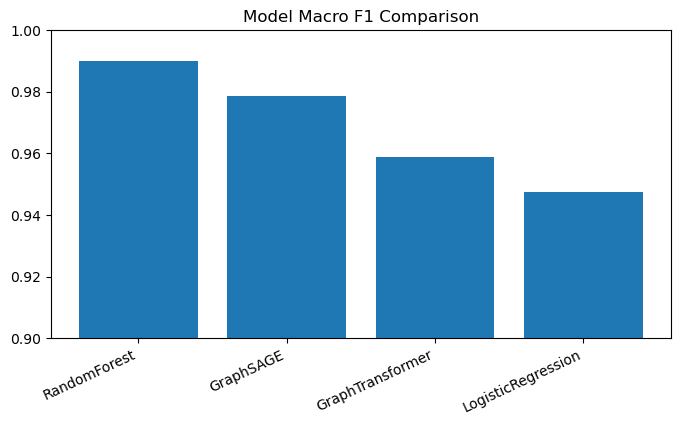

In [5]:
# plotting F1 Scores
plt.figure(figsize=(8,4))
plt.bar(df["model"], df["macro_f1"])
plt.title("Model Macro F1 Comparison")
plt.ylim(0.9, 1)
plt.xticks(rotation=25, ha="right")
plt.show()

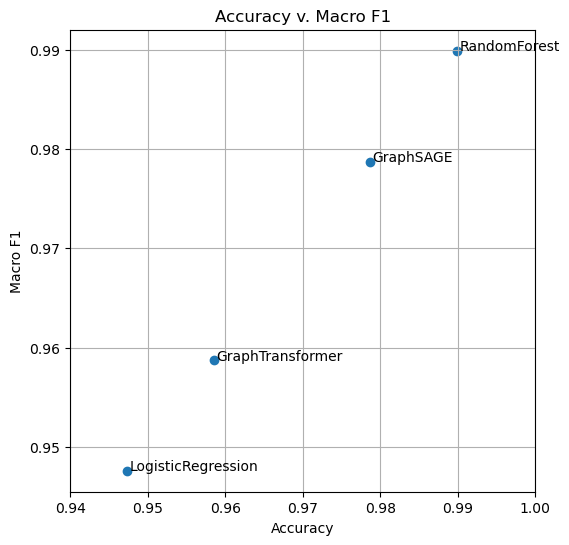

In [9]:
# scatterplot of accuracy v. macro f1

plt.figure(figsize=(6,6))
plt.scatter(df["accuracy"], df["macro_f1"])

for _, row in df.iterrows():
    plt.text(row["accuracy"] + 0.0003, row["macro_f1"], row["model"])

plt.xlabel("Accuracy")
plt.ylabel("Macro F1")
plt.title("Accuracy v. Macro F1")
plt.xlim(0.94, 1.0)
plt.grid(True)

In [ ]:
# Relative model improvements metric